# <center>[CSS Styling](https://nextjs.org/learn/dashboard-app/css-styling)</center>

Currently, your home page doesn't have any styles. Let's look at the different ways you can style your Next.js application.

## Global styles

If you look inside the `/app/ui` folder, you'll see a file called `global.css`. You can use this file to add CSS rules to all the routes in your application - such as CSS reset rules, site-wide styles for HTML elements like links, and more.

You can import `global.css` in any component in your application, but it's usually good practice to add it to your top-level component. In Next.js, this is the [root layout](https://nextjs.org/docs/app/building-your-application/routing/pages-and-layouts#root-layout-required) (more on this later).

Add global styles to your application by navigating to `/app/layout.tsx` and importing the `global.css` file:

In [ ]:
/* /app/layout.tsx */

import '@/app/ui/global.css';
 
export default function RootLayout({
  children,
}: {
  children: React.ReactNode;
}) {
  return (
    <html lang="en">
      <body>{children}</body>
    </html>
  );
}

With the development server running, save your changes and preview them in the browser. Your home page should now look like this:

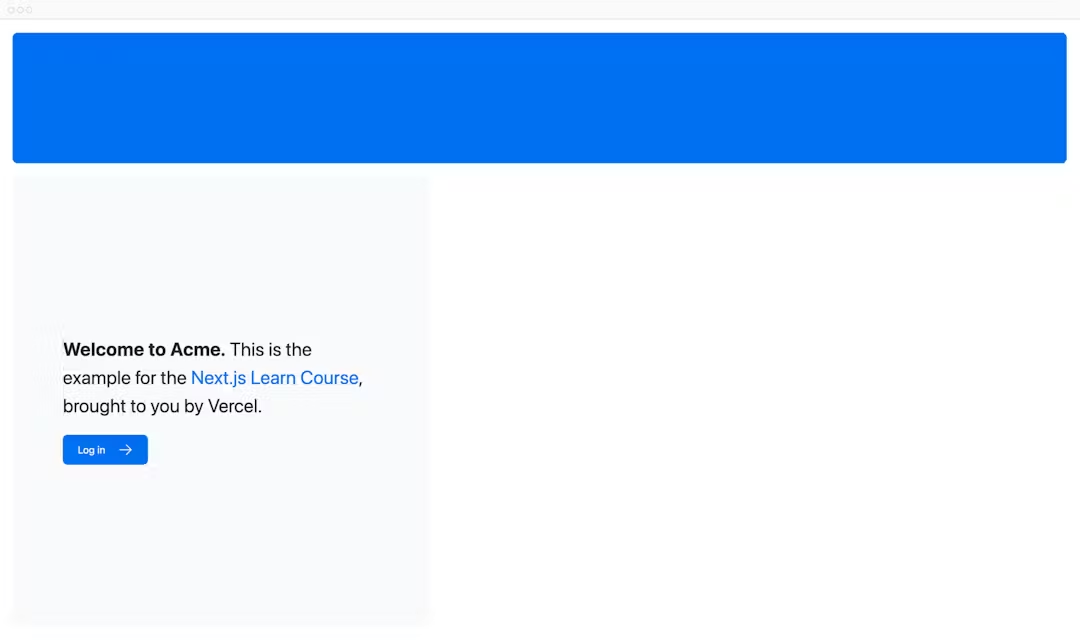

But wait a second, you didn't add any CSS rules, where did the styles come from?

If you take a look inside `global.css`, you'll notice some `@tailwind` directives:

In [ ]:
/* /app/ui/global.css */

@tailwind base;
@tailwind components;
@tailwind utilities;

## Tailwind

[Tailwind](https://tailwindcss.com/) is a CSS framework that speeds up the development process by allowing you to quickly write [utility classes](https://tailwindcss.com/docs/utility-first) directly in your TSX markup.

In Tailwind, you style elements by adding class names. For example, adding the class `"text-blue-500"` will turn the `<h1>` text blue:

In [ ]:
<h1 className="text-blue-500">I'm blue!</h1>

Although the CSS styles are shared globally, each class is singularly applied to each element. This means if you add or delete an element, you don't have to worry about maintaining separate stylesheets, style collisions, or the size of your CSS bundle growing as your application scales.

When you use `create-next-app` to start a new project, Next.js will ask if you want to use Tailwind. If you select `yes`, Next.js will automatically install the necessary packages and configure Tailwind in your application.

If you look at `/app/page.tsx`, you'll see that we're using Tailwind classes in the example.

In [ ]:
/* /app/page.tsx */

// ...

export default function Page() {
  return (
    // These are Tailwind classes:
    <main className="flex min-h-screen flex-col p-6">
      <div className="flex h-20 shrink-0 items-end rounded-lg bg-blue-500 p-4 md:h-52">
    // ...
      </div>
    </main>
  )
}

Don't worry if this is your first time using Tailwind. To save time, we've already styled all the components you'll be using.

Let's play with Tailwind! Copy the code below and paste it above the `<p>` element in `/app/page.tsx`:

In [ ]:
<div
  className="h-0 w-0 border-b-[30px] border-l-[20px] border-r-[20px] border-b-black border-l-transparent border-r-transparent"
/>

If you prefer writing traditional CSS rules or keeping your styles separate from your JSX - CSS Modules are a great alternative.

## CSS Modules

[CSS Modules](https://nextjs.org/docs/basic-features/built-in-css-support) allow you to scope CSS to a component by automatically creating unique class names, so you don't have to worry about style collisions as well.

We'll continue using Tailwind in this course, but let's take a moment to see how you can achieve the same results from the quiz above using CSS modules.

Inside `/app/ui`, create a new file called `home.module.css` and add the following CSS rules:

In [ ]:
.shape {
  height: 0;
  width: 0;
  border-bottom: 30px solid black;
  border-left: 20px solid transparent;
  border-right: 20px solid transparent;
}

Then, inside your `/app/page.tsx` file import the styles and replace the Tailwind class names from the `<div>` you've added with `styles.shape`:

In [ ]:
// ...
import styles from '@/app/ui/home.module.css';

export default function Page() {
    return (
        <main className="flex min-h-screen flex-col p-6">
            {/* // ... */}
            <div className={styles.shape} />
            {/* // ... */}
        </main>
  )
}

Save your changes and preview them in the browser. You should see the same shape as before.

Tailwind and CSS modules are the two most common ways of styling Next.js applications. Whether you use one or the other is a matter of preference - you can even use both in the same application!

## Using the `clsx` library to toggle class names

There may be cases where you may need to conditionally style an element based on state or some other condition.

[clsx](https://www.npmjs.com/package/clsx) is a library that lets you toggle class names easily. We recommend taking a look at [documentation](https://github.com/lukeed/clsx) for more details, but here's the basic usage:

- Suppose that you want to create an `InvoiceStatus` component which accepts `status`. The status can be `'pending'` or `'paid'`.

- If it's `'paid'`, you want the color to be green. If it's `'pending'`, you want the color to be gray.

You can use `clsx` to conditionally apply the classes, like this:

In [ ]:
/* /app/ui/invoices/status.tsx */

import clsx from 'clsx';
 
export default function InvoiceStatus({ status }: { status: string }) {
  return (
    <span
      className={clsx(
        'inline-flex items-center rounded-full px-2 py-1 text-sm',
        {
          'bg-gray-100 text-gray-500': status === 'pending',
          'bg-green-500 text-white': status === 'paid',
        },
      )}
    >
    // ...
    </span>
)}

## <center>It’s time to take a quiz!</center>

<center>Test your knowledge and see what you’ve just learned.</center>

Search for "clsx" in your code editor, what components use it to conditionally apply class names?

A. [`status.tsx`](nextjs-dashboard/02e/app/ui/invoices/status.tsx) and [`pagination.tsx`](nextjs-dashboard/02e/app/ui/invoices/pagination.tsx)

B. [`table.tsx`](nextjs-dashboard/02e/app/ui/invoices/table.tsx) and [`status.tsx`](nextjs-dashboard/02e/app/ui/invoices/status.tsx)

C. [`nav-links.tsx`](nextjs-dashboard/02e/app/ui/dashboard/nav-links.tsx) and [`table.tsx`](nextjs-dashboard/02e/app/ui/invoices/table.tsx)

The `status.tsx` and `pagination.tsx` components use `clsx` to conditionally apply class names.

## Other styling solutions

In addition to the approaches we've discussed, you can also style your Next.js application with:

- Sass which allows you to import `.css` and `.scss` files.

- CSS-in-JS libraries such as [styled-jsx](https://github.com/vercel/styled-jsx), [styled-components](https://github.com/vercel/next.js/tree/canary/examples/with-styled-components), and [emotion](https://github.com/vercel/next.js/tree/canary/examples/with-emotion).

Take a look at the [CSS documentation](https://nextjs.org/docs/app/building-your-application/styling) for more information.

## <center>You've Completed Chapter 2</center>

<center>Well done! You've learned about the different ways of styling a Next.js application.</center>

<center>
Next Up

**3: Optimizing Fonts and Images**

Continue working on your home page by adding a hero image and a custom font.

[<button>Start Chapter 3</button>](03_Optimizing_Fonts_and_Images.ipynb)
</center>